In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import skorch
import torch
from skorch import NeuralNetClassifier
from tqdm import tqdm
from torchvision import transforms
import torch.nn as nn
from scipy.stats import entropy
import random
import h5py
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import FeatureAgglomeration

In [2]:


# Compare Algorithmsa
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [3]:
from sklearn.metrics import matthews_corrcoef, classification_report,confusion_matrix, accuracy_score, balanced_accuracy_score, cohen_kappa_score, f1_score,  precision_score, recall_score
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [4]:
metadata = pd.read_csv("/projects/site/pred/data_science/year/2022/immunological_synapse/synapse_data_features/metadata_subset.csv.gz")
metadata

# df_features = pd.read_csv("/projects/site/pred/data_science/year/2022/immunological_synapse/synapse_data_features/df_features_subset.csv.gz")

/tmp/ipykernel_1923743/4094806748.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("/projects/site/pred/data_science/year/2022/immunological_synapse/synapse_data_features/metadata_subset.csv.gz")


,file,experiment,donor,condition,object_number,set,label
0,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,5156,unlabeled,-1
1,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,32020,unlabeled,-1
2,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,55974,unlabeled,-1
3,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,15150,unlabeled,-1
4,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,44814,unlabeled,-1
...,...,...,...,...,...,...,...
1065962,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,DIG-TCB,72493,unlabeled,-1
1065963,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,DIG-TCB,106656,unlabeled,-1
1065964,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,DIG-TCB,110990,unlabeled,-1
1065965,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,DIG-TCB,71451,unlabeled,-1


In [5]:

indx = metadata.donor == "Donor_7"
indx = indx & ( metadata.experiment == "Experiment_4")
indx = indx & metadata.set.isin(["validation","test"])

print(indx.sum())

224


In [6]:
metadata.loc[indx,"object_number"].sort_values().to_csv("to_annotate_donor1_exp22.pop", index=False)


In [7]:
metadata.loc[indx,["label","object_number"]].sort_values("object_number").to_csv("to_annotate_donor1_exp22.pop", index=False)


In [8]:
metadata.loc[indx,:].sort_values("object_number")

,file,experiment,donor,condition,object_number,set,label
767811,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_7,+SEA,28,test,T_cell
782586,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_7,+SEA,36,test,B_cell
767790,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_7,+SEA,45,test,Synapses_with_signaling
778547,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_7,+SEA,87,validation,T_cell
784381,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_7,+SEA,103,validation,T_cell
...,...,...,...,...,...,...,...
796008,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_7,-SEA,264101,validation,T_cell_with_B_cell_fragments
804999,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_7,-SEA,264425,test,T_cell_with_signaling
792493,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_7,-SEA,267851,test,Synapses_without_signaling
804900,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_7,-SEA,274036,test,Synapses_with_signaling


/pstore/data/DS4/synapse_formation_full_data/Experiment_4/Donor_7/-SEA/Experiment_3_Donor_5_-SEA_274502.h5


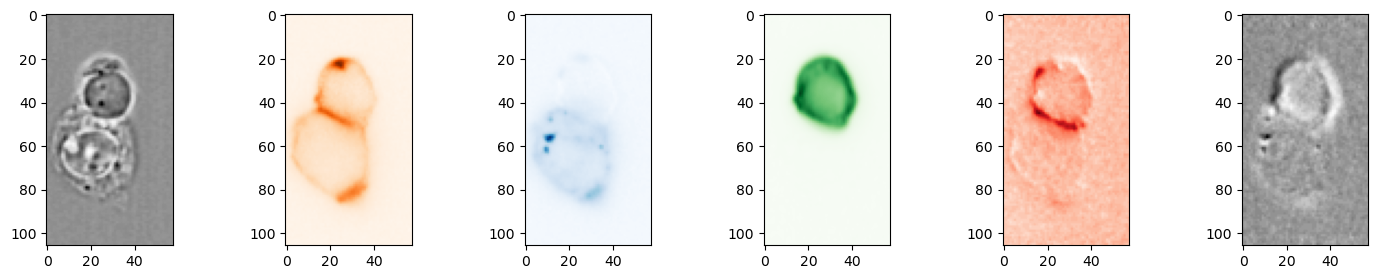

In [9]:
from imageio.v2 import imread
import h5py

file_name = metadata.loc[indx,:].sort_values("object_number")["file"].iloc[-1]
print(file_name)
file_name = file_name.replace("/pstore/data/DS4/", "/projects/site/pred/data_science/year/2022/immunological_synapse/")
image = h5py.File(file_name,"r")["image"][()]

fig, ax = plt.subplots(ncols = 6, figsize = (6*3,3))

channels_to_be_plotted = [0,3,4,5,6,7]
channel_colors = ["Greys","Oranges" ,"Blues","Greens","Reds","Greys_r"]

ax[0].imshow(image[:,:,0], cmap="Greys")

ax[1].imshow(image[:,:,3], cmap="Oranges")

ax[2].imshow(image[:,:,4], cmap="Blues")

ax[3].imshow(image[:,:,5], cmap="Greens")

ax[4].imshow(image[:,:,6], cmap="Reds")

ax[5].imshow(image[:,:,7], cmap="Greys_r")

In [10]:
'/projects/site/pred/data_science/year/2022/immunological_synapse/synapse_formation_full_data/'

'/projects/site/pred/data_science/year/2022/immunological_synapse/synapse_formation_full_data/'

In [11]:
metadata

,file,experiment,donor,condition,object_number,set,label
0,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,5156,unlabeled,-1
1,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,32020,unlabeled,-1
2,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,55974,unlabeled,-1
3,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,15150,unlabeled,-1
4,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,44814,unlabeled,-1
...,...,...,...,...,...,...,...
1065962,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,DIG-TCB,72493,unlabeled,-1
1065963,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,DIG-TCB,106656,unlabeled,-1
1065964,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,DIG-TCB,110990,unlabeled,-1
1065965,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,DIG-TCB,71451,unlabeled,-1


In [12]:
metadata["key"] = metadata["experiment"] + "_" + metadata["donor"] 

In [13]:
set_of_interesting_classes = ['B_cell',  'T_cell', 
                        'T_cell_with_signaling',
                        'T_cell_with_B_cell_fragments',
                        'B_T_cell_in_one_layer',
                        'Synapses_without_signaling', 
                        'Synapses_with_signaling',
                        'No_cell_cell_interaction', 
                        'Multiplets']

In [14]:


label_map = dict()
for i, cl in enumerate(set_of_interesting_classes):
    label_map[cl] = i
label_map['-1'] = -1
label_map[-1] = -1

inv_map = {v: k for k, v in label_map.items()}

In [15]:
inv_map


{0: 'B_cell',
 1: 'T_cell',
 2: 'T_cell_with_signaling',
 3: 'T_cell_with_B_cell_fragments',
 4: 'B_T_cell_in_one_layer',
 5: 'Synapses_without_signaling',
 6: 'Synapses_with_signaling',
 7: 'No_cell_cell_interaction',
 8: 'Multiplets',
 -1: -1}

In [16]:
labeled_index = metadata["label"].isin(set_of_interesting_classes)

train_index = metadata["set"] == "train"
train_index = train_index[train_index].index

validation_index = metadata["set"] == "validation"
validation_index = validation_index[validation_index].index

test_index = metadata["set"] == "test"
test_index = test_index[test_index].index

In [17]:
df_predictions = pd.DataFrame()
df_predictions["label"] = metadata.loc[test_index,"label"]

deepflow_preds = pd.read_csv("ml_and_dl_models/deepflow/deepflow_preds.csv").loc[:,"0"].tolist()
deepflow_preds = [inv_map[x] for x in deepflow_preds]
df_predictions["deepflow_preds"] = deepflow_preds

resnet18_barlow_twins_preds = pd.read_csv("ml_and_dl_models/resnet18 with Barlow Twins pretrained/resnet18_barlowtwins_preds.csv").loc[:,"0"].tolist()
resnet18_barlow_twins_preds = [inv_map[x] for x in resnet18_barlow_twins_preds]
df_predictions["resnet18_barlow_twins_preds"] = resnet18_barlow_twins_preds

resnet18_imagenet_preds = pd.read_csv("ml_and_dl_models/resnet18 with imagenet pretrained/resnet18_preds.csv").loc[:,"0"].tolist()
resnet18_imagenet_preds = [inv_map[x] for x in resnet18_imagenet_preds]
df_predictions["resnet18_imagenet_preds"] = resnet18_imagenet_preds

resnet34_barlow_twins_preds = pd.read_csv("ml_and_dl_models/resnet34 with Barlow Twins pretrained/resnet34_barlowtwins_preds.csv").loc[:,"0"].tolist()
resnet34_barlow_twins_preds = [inv_map[x] for x in resnet34_barlow_twins_preds]
df_predictions["resnet34_barlow_twins_preds"] = resnet34_barlow_twins_preds

resnet34_imagenet_preds = pd.read_csv("ml_and_dl_models/resnet34 with imagenet pretrained/resnet34_preds.csv").loc[:,"0"].tolist()
resnet34_imagenet_preds = [inv_map[x] for x in resnet34_imagenet_preds]
df_predictions["resnet34_imagenet_preds"] = resnet34_imagenet_preds

ae_preds = pd.read_csv("ml_and_dl_models/autoencoder features with LR/ae_preds.csv").loc[:,"0"].tolist()
ae_preds = [inv_map[x] for x in ae_preds]
df_predictions["ae_preds"] = ae_preds




LDA_preds = pd.read_csv("ml_and_dl_models/interpretable features with LDA/LDA_preds.csv").loc[:,"0"].tolist()
df_predictions["LDA_preds"] = LDA_preds

RF_preds = pd.read_csv("ml_and_dl_models/interpretable features with RF/RF_preds.csv").loc[:,"0"].tolist()
df_predictions["RF_preds"] = RF_preds

SVM_preds = pd.read_csv("ml_and_dl_models/interpretable features with SVM/SVM_preds.csv").loc[:,"0"].tolist()
df_predictions["SVM_preds"] = SVM_preds

LR_preds = pd.read_csv("ml_and_dl_models/interpretable features with LR/LR_preds.csv").loc[:,"0"].tolist()
df_predictions["LR_preds"] = LR_preds

XGBoost_preds = pd.read_csv("ml_and_dl_models/interpretable features with XGBoost/XGBoost_preds.csv").loc[:,"0"].tolist()
df_predictions["XGBoost_preds"] = XGBoost_preds

In [18]:
df_predictions = df_predictions.reset_index(drop = True)

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

predictor_results = pd.DataFrame(columns=["Model", "Macro f1-score", "Accuracy"])

for _, fold_test_index in rskf.split(df_predictions.index, df_predictions.label):
    
    new_row = pd.DataFrame({
        "Model" : "deepflow", 
        "Macro f1-score": f1_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"deepflow_preds"], average="macro"  ), 
        "Accuracy": accuracy_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"deepflow_preds"])
    }, index = [0])
    predictor_results = pd.concat([predictor_results, new_row], ignore_index=True)
    
    new_row = pd.DataFrame({
        "Model" : "resnet18_imagenet", 
        "Macro f1-score": f1_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"resnet18_imagenet_preds"], average="macro"  ), 
        "Accuracy": accuracy_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"resnet18_imagenet_preds"])
    }, index = [0])
    predictor_results = pd.concat([predictor_results, new_row], ignore_index=True)
    
    new_row = pd.DataFrame({
        "Model" : "resnet18_barlow_twins", 
        "Macro f1-score": f1_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"resnet18_barlow_twins_preds"], average="macro"  ), 
        "Accuracy": accuracy_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"resnet18_barlow_twins_preds"])
    }, index = [0])
    predictor_results = pd.concat([predictor_results, new_row], ignore_index=True)
    
    new_row = pd.DataFrame({
        "Model" : "resnet34_imagenet", 
        "Macro f1-score": f1_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"resnet34_imagenet_preds"], average="macro"  ), 
        "Accuracy": accuracy_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"resnet34_imagenet_preds"])
    }, index = [0])
    predictor_results = pd.concat([predictor_results, new_row], ignore_index=True)
    
    new_row = pd.DataFrame({
        "Model" : "resnet34_barlow_twins", 
        "Macro f1-score": f1_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"resnet34_barlow_twins_preds"], average="macro"  ), 
        "Accuracy": accuracy_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"resnet34_barlow_twins_preds"])
    }, index = [0])
    predictor_results = pd.concat([predictor_results, new_row], ignore_index=True)
    
    new_row = pd.DataFrame({
        "Model" : "ae", 
        "Macro f1-score": f1_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"ae_preds"], average="macro"  ), 
        "Accuracy": accuracy_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"ae_preds"])
    }, index = [0])
    predictor_results = pd.concat([predictor_results, new_row], ignore_index=True)
    
    new_row = pd.DataFrame({
        "Model" : "lr", 
        "Macro f1-score": f1_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"LR_preds"], average="macro"  ), 
        "Accuracy": accuracy_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"LR_preds"])
    }, index = [0])
    predictor_results = pd.concat([predictor_results, new_row], ignore_index=True)
    
    new_row = pd.DataFrame({
        "Model" : "lda", 
        "Macro f1-score": f1_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"LDA_preds"], average="macro"  ), 
        "Accuracy": accuracy_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"LDA_preds"])
    }, index = [0])
    predictor_results = pd.concat([predictor_results, new_row], ignore_index=True)
    
    new_row = pd.DataFrame({
        "Model" : "SVM", 
        "Macro f1-score": f1_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"SVM_preds"], average="macro"  ), 
        "Accuracy": accuracy_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"SVM_preds"])
    }, index = [0])
    predictor_results = pd.concat([predictor_results, new_row], ignore_index=True)
    
    new_row = pd.DataFrame({
        "Model" : "RF", 
        "Macro f1-score": f1_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"RF_preds"], average="macro"  ), 
        "Accuracy": accuracy_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"RF_preds"])
    }, index = [0])
    predictor_results = pd.concat([predictor_results, new_row], ignore_index=True)
    
    new_row = pd.DataFrame({
        "Model" : "xgb", 
        "Macro f1-score": f1_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"XGBoost_preds"], average="macro"  ), 
        "Accuracy": accuracy_score(df_predictions.loc[fold_test_index,"label"],
                                   df_predictions.loc[fold_test_index,"XGBoost_preds"])
    }, index = [0])
    predictor_results = pd.concat([predictor_results, new_row], ignore_index=True)


/tmp/ipykernel_1923743/674816347.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictor_results = pd.concat([predictor_results, new_row], ignore_index=True)


In [20]:
predictor_results.groupby(["Model"]).mean().sort_values("Macro f1-score",  ascending=False).round(2)

,Macro f1-score,Accuracy
Model,,
xgb,0.92,0.92
resnet18_barlow_twins,0.91,0.91
resnet34_imagenet,0.91,0.91
resnet34_barlow_twins,0.91,0.91
deepflow,0.90,0.90
resnet18_imagenet,0.90,0.90
RF,0.90,0.90
lr,0.90,0.90
SVM,0.90,0.90


In [21]:
predictor_results.groupby(["Model"]).std().loc[predictor_results.groupby(["Model"]).mean().sort_values("Macro f1-score",  ascending=False).index,:].round(2)

,Macro f1-score,Accuracy
Model,,
xgb,0.01,0.01
resnet18_barlow_twins,0.02,0.01
resnet34_imagenet,0.02,0.01
resnet34_barlow_twins,0.01,0.01
deepflow,0.01,0.01
resnet18_imagenet,0.01,0.01
RF,0.01,0.01
lr,0.02,0.01
SVM,0.01,0.01


In [22]:
predictor_results.groupby(["Model"]).mean().sort_values("Macro f1-score",  ascending=False).index

Index(['xgb', 'resnet18_barlow_twins', 'resnet34_imagenet',
       'resnet34_barlow_twins', 'deepflow', 'resnet18_imagenet', 'RF', 'lr',
       'SVM', 'lda', 'ae'],
      dtype='object', name='Model')

/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

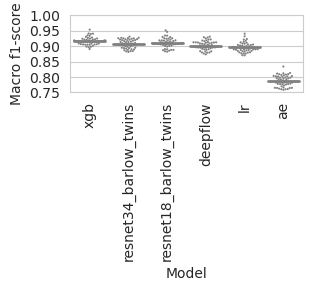

In [23]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (3,1)) 

key_order = ['xgb', 'resnet34_barlow_twins', 'resnet18_barlow_twins',  'deepflow', 'lr',   'ae']

ax = sns.swarmplot(data=predictor_results,x = "Model", 
            y = "Macro f1-score", 
            palette=["Grey"],
                   s = 1.52,
            order = key_order, 
                   ax = ax)

ax = sns.boxplot(
    showmeans=True,
            meanline=True,
            meanprops={'color': 'grey', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Model",
            y="Macro f1-score", 
            order = key_order,
            data=predictor_results,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

ax.set_xticklabels(key_order, rotation = 90)

plt.ylim(0.75, 
         1.00)

plt.yticks([0.75,0.80,0.85,0.90,0.95,1.00])

plt.savefig("Figure - Comparison of different classifers.svg")
plt.savefig("Figure - Comparison of different classifers.png")

In [24]:
predictor_results.to_csv("Source Data Figure 1b.csv", index=False)

/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

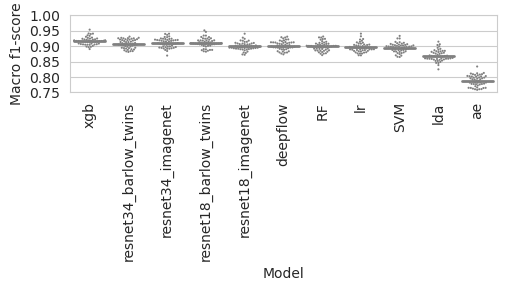

In [25]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (5.5,1)) 

key_order = ['xgb',
             'resnet34_barlow_twins',
             'resnet34_imagenet',
             'resnet18_barlow_twins',
             'resnet18_imagenet',
             'deepflow',
             'RF',
             'lr',
             'SVM',
             'lda',
             'ae']

ax = sns.swarmplot(data=predictor_results,x = "Model", 
            y = "Macro f1-score", 
            palette=["Grey"],
                   s = 1.52,
            order = key_order, 
                   ax = ax)

ax = sns.boxplot(
    showmeans=True,
            meanline=True,
            meanprops={'color': 'grey', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Model",
            y="Macro f1-score", 
            order = key_order,
            data=predictor_results,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

ax.set_xticklabels(key_order, rotation = 90)

plt.ylim(0.75, 
         1.00)

plt.yticks([0.75,0.80,0.85,0.90,0.95,1.00])

plt.savefig("Supplementary Figure - Comparison of all classifers.svg")
plt.savefig("Supplementary Figure - Comparison of all classifers.png")

/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

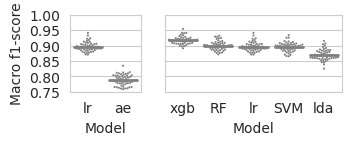

In [26]:
fig, ax = plt.subplots(ncols = 2, figsize = (7*0.5,1), gridspec_kw={'width_ratios': [2, 5]}, sharey=True) 

key_order = ['xgb', 'resnet18_barlow_twins', 'resnet34_imagenet',
       'resnet34_barlow_twins', 'deepflow', 'resnet18_imagenet', 'RF', 'lr',
       'SVM', 'lda', 'ae']

ax[0] = sns.swarmplot(data=predictor_results,x = "Model", 
            y = "Macro f1-score", 
            palette=["Grey"],
                   s = 1.52,
            order = ['lr', 'ae'], 
                   ax = ax[0])

ax[0] = sns.boxplot(
    showmeans=True,
            meanline=True,
            meanprops={'color': 'grey', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Model",
            y="Macro f1-score", 
            order = ['lr', 'ae'],
            data=predictor_results,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax[0])


ax[1] = sns.swarmplot(data=predictor_results,x = "Model", 
            y = "Macro f1-score", 
            palette=["Grey"],
                   s = 1.52,
            order = ['xgb', 'RF', 'lr', 'SVM', 'lda'], 
                   ax = ax[1])

ax[1] = sns.boxplot(
    showmeans=True,
            meanline=True,
            meanprops={'color': 'grey', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Model",
            y="Macro f1-score", 
            order = ['xgb', 'RF', 'lr', 'SVM', 'lda'],
            data=predictor_results,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax[1])


plt.ylim(0.75, 
         1.00)

plt.yticks([0.75,0.80,0.85,0.90,0.95,1.00])

plt.savefig("Supplementary Figure - for the reviewer.svg")
plt.savefig("Supplementary Figure - for the reviewer.png")

In [27]:
for k in key_order:
    indx = predictor_results.Model == k
    print(k, 
          "mean", round(predictor_results.loc[indx, "Macro f1-score"].mean(),2),
         "std", round(predictor_results.loc[indx, "Macro f1-score"].std(),2)           )

xgb mean 0.92 std 0.01
resnet18_barlow_twins mean 0.91 std 0.02
resnet34_imagenet mean 0.91 std 0.02
resnet34_barlow_twins mean 0.91 std 0.01
deepflow mean 0.9 std 0.01
resnet18_imagenet mean 0.9 std 0.01
RF mean 0.9 std 0.01
lr mean 0.9 std 0.02
SVM mean 0.9 std 0.01
lda mean 0.87 std 0.02
ae mean 0.79 std 0.02


## Donor cross validation & experiment cross validation

In [28]:

df_features = pd.read_csv("/projects/site/pred/data_science/year/2022/immunological_synapse/synapse_data_features/df_features_subset.csv.gz")
df_features

,mask_based_area_BF,mask_based_bbox_area_BF,mask_based_convex_area_BF,mask_based_eccentricity_BF,mask_based_equivalent_diameter_BF,mask_based_euler_number_BF,mask_based_extent_BF,mask_based_feret_diameter_max_BF,mask_based_filled_area_BF,mask_based_major_axis_length_BF,...,max_intensity_ratio_MHCII_R7_R8,sum_intensity_ratio_CD3_R7_R8,mean_intensity_ratio_CD3_R7_R8,max_intensity_ratio_CD3_R7_R8,sum_intensity_ratio_P-CD3zeta_R7_R8,mean_intensity_ratio_P-CD3zeta_R7_R8,max_intensity_ratio_P-CD3zeta_R7_R8,sum_intensity_ratio_Live-Dead_R7_R8,mean_intensity_ratio_Live-Dead_R7_R8,max_intensity_ratio_Live-Dead_R7_R8
0,2228,3021,2392,0.484394,53.261409,1,0.737504,61.717096,2228,57.336477,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,885,1155,925,0.238094,33.568095,1,0.766234,36.138622,885,34.216438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,656,812,689,0.369856,28.900608,1,0.807882,32.756679,656,30.262314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,753,899,780,0.386491,30.963678,1,0.837597,34.132096,753,32.348559,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1208,1512,1247,0.661747,39.218279,1,0.798942,51.224994,1208,45.782110,...,19.735296,0.465222,0.465222,25.504583,0.481531,0.481531,26.397369,0.754085,0.754085,45.835530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065962,973,1190,997,0.100885,35.197473,1,0.817647,37.215588,973,35.332773,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1065963,3956,5046,4180,0.787555,70.971372,1,0.783987,91.760558,3956,91.437834,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1065964,909,1073,928,0.622298,34.020211,1,0.847158,40.804412,909,38.830446,...,5.716450,0.190820,0.190820,7.474995,0.115499,0.115499,4.191402,1.000000,1.000000,32.928658
1065965,3388,4272,3670,0.875994,65.679035,1,0.793071,90.426766,3388,96.830707,...,6.247939,0.039196,0.039196,124.378412,0.045108,0.045108,140.202637,0.005466,0.005466,16.385927


In [29]:
list_of_features_to_exclude = ["Antibody","Live-Dead","CD18",  "_R2",  "_R3",  "_R8", "background",
                               "moment","percent","mask_based_mean","mask_based_min","mask_based_max",  
                               "RMS","intensity_BF","_R1_R2","_R1_R3","_R1_R4","_R1_R5","_R1_R6","_R1_R7",
                               "_R1_R8","_R2_R1","_R2_R3","_R2_R4","_R2_R5","_R2_R6","_R2_R7","_R2_R8",
                               "_R3_R1","_R3_R2","_R3_R4","_R3_R5","_R3_R6","_R3_R7","_R3_R8",
                               "_R4_R1","_R4_R2","_R4_R3","_R4_R5","_R4_R6","_R4_R7","_R4_R8",
                               "_R5_R1","_R5_R2","_R5_R3","_R5_R4","_R5_R8","_R6_R1","_R6_R2",
                               "_R6_R3","_R6_R4","_R6_R5","_R6_R7","_R6_R8","_R7_R1","_R7_R2",
                               "_R7_R3","_R7_R4","_R7_R5","_R7_R6","_R7_R8","_R8_R1","_R8_R2",
                               "_R8_R3","_R8_R4","_R8_R5","_R8_R6","_R8_R7","cell_distance"]
classification_indx = ~df_features.columns.str.contains( list_of_features_to_exclude[0]) 

for f_to_exclude in list_of_features_to_exclude:
    classification_indx = classification_indx & ~df_features.columns.str.contains( f_to_exclude) 
    

print("list of remained columns:\n", 
      df_features.columns[classification_indx],
     "\n",
     "so we have these many columns:",
     classification_indx.sum())

list of remained columns:
 Index(['mask_based_area_BF', 'mask_based_bbox_area_BF',
       'mask_based_convex_area_BF', 'mask_based_eccentricity_BF',
       'mask_based_equivalent_diameter_BF', 'mask_based_euler_number_BF',
       'mask_based_extent_BF', 'mask_based_feret_diameter_max_BF',
       'mask_based_filled_area_BF', 'mask_based_major_axis_length_BF',
       ...
       'max_intensity_ratio_F-Actin_R5_R7', 'sum_intensity_ratio_MHCII_R5_R7',
       'mean_intensity_ratio_MHCII_R5_R7', 'max_intensity_ratio_MHCII_R5_R7',
       'sum_intensity_ratio_CD3_R5_R7', 'mean_intensity_ratio_CD3_R5_R7',
       'max_intensity_ratio_CD3_R5_R7', 'sum_intensity_ratio_P-CD3zeta_R5_R7',
       'mean_intensity_ratio_P-CD3zeta_R5_R7',
       'max_intensity_ratio_P-CD3zeta_R5_R7'],
      dtype='object', length=247) 
 so we have these many columns: 247


In [30]:
label_map = dict()
for i, cl in enumerate(set_of_interesting_classes):
    label_map[cl] = i

label_map['-1'] = -1
label_map[-1] = -1

print(label_map)

{'B_cell': 0, 'T_cell': 1, 'T_cell_with_signaling': 2, 'T_cell_with_B_cell_fragments': 3, 'B_T_cell_in_one_layer': 4, 'Synapses_without_signaling': 5, 'Synapses_with_signaling': 6, 'No_cell_cell_interaction': 7, 'Multiplets': 8, '-1': -1, -1: -1}


In [31]:
from sklearn.pipeline import Pipeline
from scifAI.ml.auto_feature_selection import AutoFeatureSelection
from sklearn.model_selection import cross_val_score, LeaveOneGroupOut
from sklearn.linear_model import LogisticRegressionCV

labeled_index = metadata["label"].isin(set_of_interesting_classes)
labeled_index = labeled_index &  metadata["set"].isin(["train","validation", "test"])

scores = []
top_k = 130

for key in metadata.loc[:,"key"].unique():
    print(key)
    group_val = metadata.key.isin([key])
    group_val = group_val & labeled_index

    group_train = ~metadata.key.isin([key])
    group_train = group_train & labeled_index

    if group_train.sum()*group_val.sum():
    
        xgb = Pipeline([
                        ('StandardScaler', StandardScaler()), 
#                         ('AutoFeatureSelection', AutoFeatureSelection( top_k = top_k , verbose=False)),''
                         ('xgb', XGBClassifier(n_jobs = -1, 
                                       n_estimators = 100, 
                                       eval_metric = "logloss") )
                ], verbose=False)
        xgb = xgb.fit(df_features.loc[group_train,classification_indx],
                      metadata.loc[group_train,"label"].replace(label_map))

        y_pred = xgb.predict(df_features.loc[group_val,classification_indx])
        y_true = metadata.loc[group_val,"label"].replace(label_map)

        scores.append({key:f1_score(y_true,y_pred,average="macro")})


ImportError: cannot import name 'greycomatrix' from 'skimage.feature' (/home/shetabs1/.local/lib/python3.11/site-packages/skimage/feature/__init__.py)

In [ ]:
scores = pd.melt(pd.DataFrame(scores)).dropna().reset_index(drop=True)

scores["experiment"] =scores["variable"]

for donor in metadata.donor.unique():
    scores["experiment"] = scores["experiment"].str.replace("_"+donor,"")
    
scores["variable"] = "f1_macro"

In [ ]:
scores

In [ ]:
print("f1_macro:",
      "median",
      scores.value.median().round(2),
      "mean",
      scores.value.mean().round(2),
      "std",
      scores.value.std().round(2))

In [ ]:

fig,ax =plt.subplots(figsize=(1,3))

ax=sns.stripplot(data = scores , 
                       x = "variable",
                       y = "value", 
                       hue = "experiment", 
                       hue_order = [
                                    "Experiment_1",
                                    "Experiment_2",
                                    "Experiment_3",
                                    "Experiment_4"],
                       s = 5,
                       linewidth=1,
#                        split = True,
                      palette=np.array([(1,1,1 ),
                                        (0.85, 0.85, 0.85 ),
                                        (0.60, 0.60, 0.60 ),
                                        (0.2,0.2,0.2 )]),
                       dodge=False,
                      ax = ax) 


ax = sns.boxplot(
            data = scores , 
                       x = "variable",
                       y = "value", 
            whiskerprops={'visible': False},
            zorder=10,
            palette=["black"],
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)
ax.legend().remove()

plt.savefig('Supplementary Figure - donor cross validation.svg', bbox_inches="tight")
plt.savefig('Supplementary Figure - donor cross validation.png', bbox_inches="tight")

In [ ]:
label_map